Mean Squared Error: 9715295.71
R-Squared: 0.56


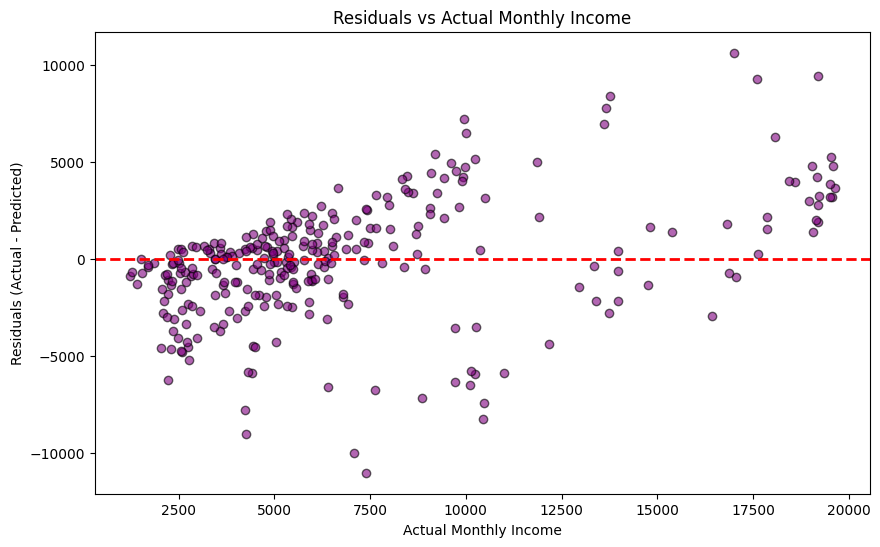

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 2: Load Dataset
data = pd.read_csv('/content/HR-Employee-Attrition.csv')  # Replace with the correct path to your dataset

# Step 3: Data Preprocessing
# Select relevant columns and drop rows with missing values
data_cleaned = data[['Age', 'YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome']].dropna()

# Define features (X) and target (Y)
X = data_cleaned[['Age', 'YearsAtCompany', 'TotalWorkingYears']]
Y = data_cleaned['MonthlyIncome']

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 5: Train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Step 8: Visualization - Residuals Scatter Plot
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.6, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Actual Monthly Income")
plt.xlabel("Actual Monthly Income")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()
